使用我们上节课的数据，然后我们使用逻辑回归算法中的decisin_score来进行调节

In [26]:
# %load ./Scripts/confusion_matrix.py
import numpy as np

# 实现我们的TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

def precision(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    return tp / (tp + fp)
    
def recall(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    return tp / (tp + fn)
    
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
# 我们选取两个来做二分类的为题就好了
iris_x = X[Y<2]
iris_y = Y[Y<2]

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# 使用留一法处理数据
def train_test_split(x, y):
    shuffle_indexs = np.random.permutation(len(x))
    # 看我们要留几成当作测试数据集
    test_radio = 0.3
    # 求出test的个数
    test_size = int(len(x)*test_radio)

    # 比如说我现在0-test_size当作test的数据 test_size-最后当成train数据
    test_indexs = shuffle_indexs[:test_size]
    train_indexs = shuffle_indexs[test_size:]
    # 使用fance indexing 进行取值
    train_x = x[train_indexs]
    train_y = y[train_indexs]

    test_x = x[test_indexs]
    test_y = y[test_indexs]
    return train_x, test_x, train_y, test_y
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y)
knn_clf.fit(train_x, train_y)
y_predict = knn_clf.predict(test_x)
confusion_matrix(test_y, y_predict)


array([[12,  0],
       [ 0, 18]])

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)
y_predict = log_reg.predict(test_x)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
confusion_matrix(test_y, y_predict)

array([[12,  0],
       [ 1, 17]])

In [1]:
# 这个再我们后续的逻辑回归的实现中会讲解到
decision_scores = log_reg.decision_function(test_x)
decision_scores[:10]

NameError: name 'log_reg' is not defined

In [30]:
np.min(decision_scores)

-3.946365717920264

In [31]:
np.max(decision_scores)

2.6148687292356243

In [32]:
#我们可以通过设置decision_score的值来得到，精准率和召回率的平衡，或着我们更侧重于哪个值
# 可以进行相适应的调整
y_predict2 = np.array(decision_scores > 2)

In [33]:
confusion_matrix(test_y, y_predict2)

array([[12,  0],
       [13,  5]])

P-R曲线

In [35]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision(test_y, y_predict))
    recalls.append(recall(test_y, y_predict))

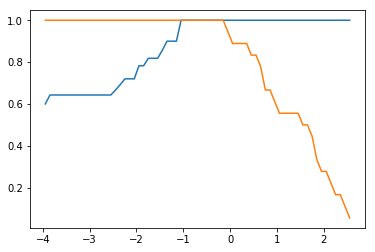

In [37]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

END